# quant-econ Solutions: Julia by Example

Solutions for http://quant-econ.net/jl/julia_by_example.html

## Exercise 1

In [3]:
function factorial2(n)
    k = 1
    for i in 1:n
        k = k * i
    end
    return k
end

factorial2(4) 

24

In [4]:
factorial(4)  # Built in function

24

## Exercise 2

In [12]:
function binomial_rv(n, p)
    count = 0
    U = rand(n)
    for i in 1:n
        if U[i] < p
            count = count + 1    # Or count += 1
        end
    end
    return count
end

for j in 1:25
    b = binomial_rv(10, 0.5)
    print("$b, ")
end

4, 3, 5, 6, 5, 6, 0, 6, 6, 8, 5, 6, 6, 5, 2, 5, 3, 4, 7, 5, 5, 6, 3, 5, 6, 

## Exercise 3

Consider the circle of diameter 1 embedded in the unit square

Let $A$ be its area and let $r=1/2$ be its radius  

If we know $\pi$ then we can compute $A$ via $A = \pi r^2$

But here the point is to compute $\pi$, which we can do by $\pi = A / r^2$

Summary: If we can estimate the area of the unit circle, then dividing by $r^2 = (1/2)^2 = 1/4$
gives an estimate of $\pi$

We estimate the area by sampling bivariate uniforms and looking at the fraction that fall into the unit circle


In [16]:
n = 1000000

count = 0
for i in 1:n
    u, v = rand(2)
    d = sqrt((u - 0.5)^2 + (v - 0.5)^2)  # Distance from middle of square
    if d < 0.5
        count += 1
    end
end

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.14064

## Exercise 4

In [25]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    if U < 0.5
        count += 1
    else
        count = 0
    end
    print(count)
    if count == 3
        payoff = 1
    end
end
print("\n")
println("payoff = $payoff")

Count = 0123450000
payoff = 1


We can simplify this somewhat using the **ternary operator**.  Here's some examples

In [30]:
a = 1 < 2 ? "foo" : "bar"
a

"foo"

In [31]:
a = 1 > 2 ? "foo" : "bar"
a

"bar"

Using this construction:

In [29]:
payoff = 0
count = 0

print("Count = ")

for i in 1:10
    U = rand()
    count = U < 0.5 ? count + 1 : 0  
    print(count)
    if count == 3
        payoff = 1
    end
end
print("\n")
println("payoff = $payoff")

Count = 1201234500
payoff = 1


## Exercise 5

Here's one solution

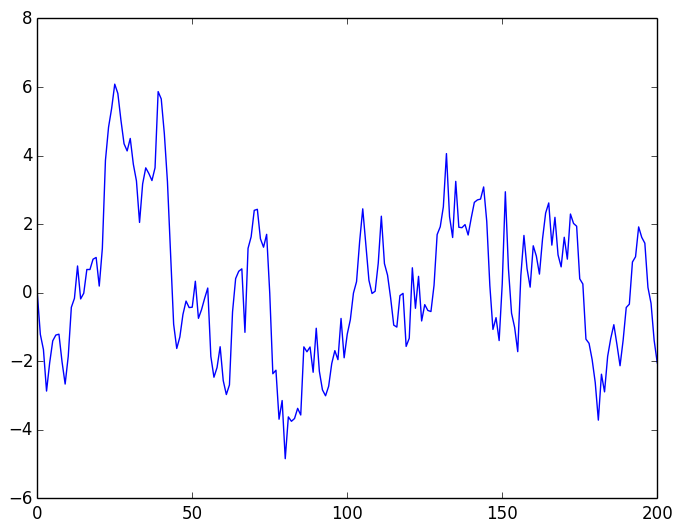

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f14d6d8f3d0>

In [34]:
using PyPlot

alpha = 0.9
T = 200
x = zeros(T + 1)

for t in 1:T
    x[t+1] = alpha * x[t] + randn()
end
plot(x, "b-")

## Exercise 6

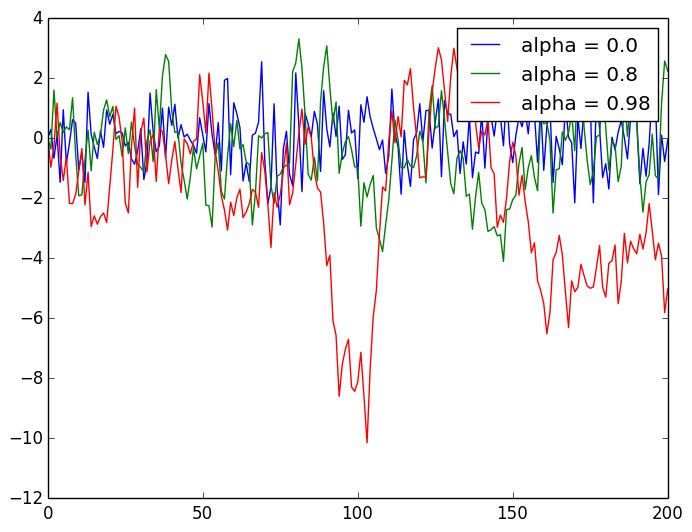

PyObject <matplotlib.legend.Legend object at 0x7f14bb82b710>

In [39]:
alphas = [0.0, 0.8, 0.98]
T = 200
x = zeros(T + 1)

for alpha in alphas
    x[1] = 0
    for t in 1:T
        x[t+1] = alpha * x[t] + randn()
    end
    plot(x, label="alpha = $alpha")
end
legend()